In [1]:
import ase
import ase.io
import ase.geometry
from ase.build.rotate import rotation_matrix_from_points
import numpy as np
import nglview
import json

/home/hinom/GitHub/RP_tensor_network/scripts/chrypto/coordinate/.venv/lib/python3.12/site-packages/nglview/__init__.py:12: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


# Chromophore
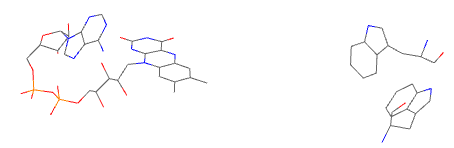

FAD
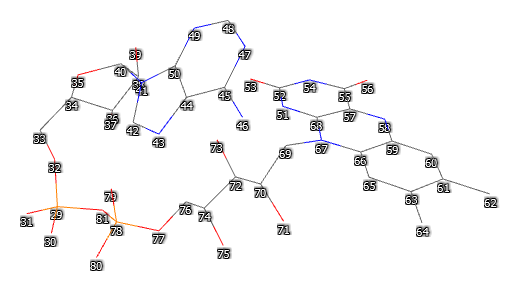

TrpC+D
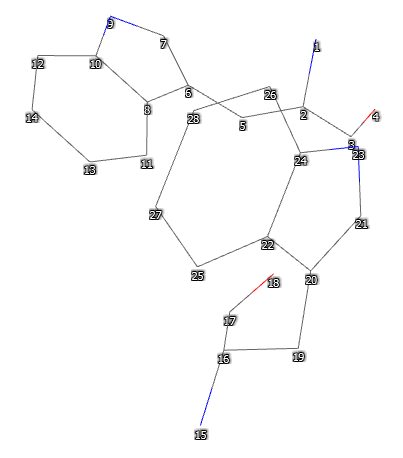

In [2]:
chm = ase.io.read("FAD-TrpC-TrpD.xyz")

In [3]:
nglview.show_ase(chm)

NGLWidget()

In [4]:
chm.positions

array([[ -1.224,  19.933, -51.654],
       [ -2.625,  19.55 , -51.543],
       [ -3.521,  20.581, -52.226],
       [ -3.185,  21.761, -52.306],
       [ -3.02 ,  19.44 , -50.069],
       [ -2.131,  18.559, -49.243],
       [ -1.173,  18.964, -48.354],
       [ -2.147,  17.122, -49.197],
       [ -0.578,  17.868, -47.775],
       [ -1.167,  16.726, -48.264],
       [ -2.893,  16.133, -49.86 ],
       [ -0.904,  15.384, -47.981],
       [ -2.642,  14.809, -49.577],
       [ -1.654,  14.438, -48.636],
       [ -7.404,  14.485, -51.954],
       [ -6.147,  15.232, -52.059],
       [ -6.237,  16.586, -51.357],
       [ -5.704,  17.588, -51.839],
       [ -5.724,  15.408, -53.519],
       [ -4.217,  15.572, -53.673],
       [ -3.551,  16.692, -54.085],
       [ -3.208,  14.58 , -53.406],
       [ -2.196,  16.457, -54.098],
       [ -1.958,  15.172, -53.683],
       [ -3.241,  13.251, -52.963],
       [ -0.75 ,  14.479, -53.545],
       [ -2.034,  12.565, -52.809],
       [ -0.809,  13.178, -5

In [5]:
chm = ase.io.read("FAD-TrpC-TrpD.xyz")
fla_ring_inds = (50, 51, 53, 54, 56, 57, 58, 59, 60, 62, 64, 65, 66)
TrpC_ring_inds = (5, 6, 8, 9, 11, 13, 12, 10, 7)
TrpD_ring_inds = (19, 20, 22, 23, 25, 27, 26, 24, 21)

fla_ring_posi = chm.positions[fla_ring_inds, :].copy()
com_fla_ring = np.mean(fla_ring_posi, axis=0)
chm.positions -= com_fla_ring[None, :]

print(chm.positions)

vec_y = np.mean(chm.positions[(51, 53), :], axis=0) - np.mean(
    chm.positions[(60, 62), :], axis=0
)
vec_x = chm.positions[57] - chm.positions[66]
vec_z = np.cross(vec_x, vec_y)

R = rotation_matrix_from_points(
    np.array([[0, 0, 0], (vec_x).tolist(), (vec_y).tolist(), (vec_z).tolist()]).T,
    np.array(
        [
            [0, 0, 0],
            [np.linalg.norm(vec_x), 0, 0],
            [0, np.linalg.norm(vec_y), 0],
            [0, 0, np.linalg.norm(vec_z)],
        ]
    ).T,
)

R = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]) @ R

chm.set_positions(np.einsum("ij,kj->ki", R, chm.positions))
print(R)
print(chm.positions)
view = nglview.show_ase(chm)
view

[[ 5.47238462e+00  9.51992308e+00 -1.84394615e+01]
 [ 4.07138462e+00  9.13692308e+00 -1.83284615e+01]
 [ 3.17538462e+00  1.01679231e+01 -1.90114615e+01]
 [ 3.51138462e+00  1.13479231e+01 -1.90914615e+01]
 [ 3.67638462e+00  9.02692308e+00 -1.68544615e+01]
 [ 4.56538462e+00  8.14592308e+00 -1.60284615e+01]
 [ 5.52338462e+00  8.55092308e+00 -1.51394615e+01]
 [ 4.54938462e+00  6.70892308e+00 -1.59824615e+01]
 [ 6.11838462e+00  7.45492308e+00 -1.45604615e+01]
 [ 5.52938462e+00  6.31292308e+00 -1.50494615e+01]
 [ 3.80338462e+00  5.71992308e+00 -1.66454615e+01]
 [ 5.79238462e+00  4.97092308e+00 -1.47664615e+01]
 [ 4.05438462e+00  4.39592308e+00 -1.63624615e+01]
 [ 5.04238462e+00  4.02492308e+00 -1.54214615e+01]
 [-7.07615385e-01  4.07192308e+00 -1.87394615e+01]
 [ 5.49384615e-01  4.81892308e+00 -1.88444615e+01]
 [ 4.59384615e-01  6.17292308e+00 -1.81424615e+01]
 [ 9.92384615e-01  7.17492308e+00 -1.86244615e+01]
 [ 9.72384615e-01  4.99492308e+00 -2.03044615e+01]
 [ 2.47938462e+00  5.15892308e+

NGLWidget()

In [6]:
fla_ring_posi = chm.positions[fla_ring_inds, :].copy()
fla_ring_sym = chm.symbols[fla_ring_inds,]
fla_ring = ase.Atoms(fla_ring_sym, fla_ring_posi)

print(fla_ring_posi)

TrpD_ring_posi = chm.positions[TrpD_ring_inds, :]
TrpD_ring_sym = chm.symbols[TrpD_ring_inds,]
TrpD_ring = ase.Atoms(TrpD_ring_sym, TrpD_ring_posi)

print(
    TrpD_ring_posi,
    np.mean(TrpD_ring_posi, axis=0),
    np.linalg.norm(np.mean(TrpD_ring_posi, axis=0)),
)

TrpC_ring_posi = chm.positions[TrpC_ring_inds, :]
TrpC_ring_sym = chm.symbols[TrpC_ring_inds,]
TrpC_ring = ase.Atoms(TrpC_ring_sym, TrpC_ring_posi)

print(
    TrpC_ring_posi,
    np.mean(TrpC_ring_posi, axis=0),
    np.linalg.norm(np.mean(TrpC_ring_posi, axis=0)),
)

R = rotation_matrix_from_points(
    (TrpC_ring_posi - np.mean(TrpC_ring_posi, axis=0)).T,
    (TrpD_ring_posi - np.mean(TrpD_ring_posi, axis=0)).T,
)

print(f"{R=}")

print(
    TrpD_ring_posi - np.mean(TrpD_ring_posi, axis=0),
    np.einsum("ij,kj->ki", R, TrpC_ring_posi - np.mean(TrpC_ring_posi, axis=0)),
)

[[-1.44599291  2.4638411   0.04997661]
 [-0.76568176  3.64667183  0.00918196]
 [ 0.61982054  3.63673188 -0.00774698]
 [ 1.42123279  2.50197094 -0.01962157]
 [ 0.67518163  1.25474333 -0.01207289]
 [ 1.3577008   0.11899223 -0.01643394]
 [ 0.6316636  -1.07148931 -0.00945636]
 [ 1.32903047 -2.28968422 -0.03342776]
 [ 0.64086967 -3.50730907 -0.01282597]
 [-0.76499838 -3.50982108  0.01426095]
 [-1.45533252 -2.30188412  0.03237444]
 [-0.7759907  -1.0892557   0.02222547]
 [-1.46750322  0.1464922  -0.01643394]]
[[ 10.15992544 -18.48199443   2.54995701]
 [ 11.23921064 -18.63294435   3.37461305]
 [ 10.81990141 -18.81505753   4.67169961]
 [  9.44985392 -18.7765739    4.71148479]
 [  8.57553402 -18.923668     5.79429828]
 [  7.22661333 -18.84000052   5.5396245 ]
 [  6.74382371 -18.62349778   4.24236942]
 [  7.6157434  -18.49371557   3.15882264]
 [  8.99537257 -18.5688476    3.39239818]] [  8.98066427 -18.6840333    4.15947416] 21.143477867908103
[[ 11.4729784  -13.59698933   5.25385827]
 [ 11.47229

In [7]:
fad_inds = tuple(range(28, 81))
fad_posi = chm.positions[fad_inds, :].copy()
fad_sym = chm.symbols[fad_inds,]
fad = ase.Atoms(fad_sym, fad_posi)

print(fad_posi)

TrpD_inds = tuple(range(14, 28))
TrpD_posi = chm.positions[TrpD_inds, :]
TrpD_sym = chm.symbols[TrpD_inds,]
TrpD = ase.Atoms(TrpD_sym, TrpD_posi)

TrpC_inds = tuple(range(0, 14))
TrpC_posi = chm.positions[TrpC_inds, :]
TrpC_sym = chm.symbols[TrpC_inds,]
TrpC = ase.Atoms(TrpC_sym, TrpC_posi)

nglview.show_ase(fad)

[[-9.46525936e+00  3.71414059e+00 -2.21531428e+00]
 [-1.01543701e+01  2.41717824e+00 -2.08457776e+00]
 [-1.01764781e+01  4.81570307e+00 -3.01723573e+00]
 [-9.22727627e+00  4.23504261e+00 -7.17974257e-01]
 [-9.16240639e+00  5.64161282e+00 -4.01703535e-01]
 [-7.89004249e+00  5.92665313e+00  3.72167339e-01]
 [-7.87194184e+00  5.18676267e+00  1.61784285e+00]
 [-6.59146545e+00  5.54683740e+00 -3.25406083e-01]
 [-6.21829682e+00  6.55252971e+00 -1.26105461e+00]
 [-5.62641272e+00  5.39665007e+00  8.56512270e-01]
 [-5.11348166e+00  6.64701083e+00  1.31848058e+00]
 [-6.54469635e+00  4.76662726e+00  1.90922516e+00]
 [-6.51751611e+00  3.30614344e+00  1.92897988e+00]
 [-7.24714729e+00  2.45036226e+00  1.14273697e+00]
 [-7.01688439e+00  1.18034913e+00  1.37952936e+00]
 [-6.07354070e+00  1.20101690e+00  2.39137053e+00]
 [-5.40701680e+00  1.72798453e-01  3.08904215e+00]
 [-5.61202127e+00 -1.13689225e+00  2.86712003e+00]
 [-4.52262597e+00  5.36744938e-01  4.04456024e+00]
 [-4.30978095e+00  1.83698637e+

NGLWidget()

In [8]:
for ele, posi in zip(fad.symbols, fad.positions, strict=True):
    print(f"{ele}   {posi[0]: .8f}   {posi[1]: .8f}   {posi[2]: .8f}")

P   -9.46525936    3.71414059   -2.21531428
O   -10.15437010    2.41717824   -2.08457776
O   -10.17647811    4.81570307   -3.01723573
O   -9.22727627    4.23504261   -0.71797426
C   -9.16240639    5.64161282   -0.40170354
C   -7.89004249    5.92665313    0.37216734
O   -7.87194184    5.18676267    1.61784285
C   -6.59146545    5.54683740   -0.32540608
O   -6.21829682    6.55252971   -1.26105461
C   -5.62641272    5.39665007    0.85651227
O   -5.11348166    6.64701083    1.31848058
C   -6.54469635    4.76662726    1.90922516
N   -6.51751611    3.30614344    1.92897988
C   -7.24714729    2.45036226    1.14273697
N   -7.01688439    1.18034913    1.37952936
C   -6.07354070    1.20101690    2.39137053
C   -5.40701680    0.17279845    3.08904215
N   -5.61202127   -1.13689225    2.86712003
N   -4.52262597    0.53674494    4.04456024
C   -4.30978095    1.83698637    4.27298137
N   -4.87297665    2.89110543    3.67295420
C   -5.75434742    2.50415118    2.74342691
N   -1.44599291    2.46384110 

In [9]:
ase.io.write("FAD-wo-H.xyz", fad)

In [10]:
ase.io.write("TrpC-wo-H.xyz", TrpC)

In [11]:
ase.io.write("TrpD-wo-H.xyz", TrpD)

In [12]:
# Optimised geometry started from TrpC-w-H.xyz
TrpC_opt = ase.io.read("TrpC-opt-dihedral.xyz")
TrpC_opt_posi = TrpC_opt.positions[:14,]  # Except for additional O and H
nglview.show_ase(TrpC_opt)

NGLWidget()

In [13]:
R_C = rotation_matrix_from_points(
    (TrpC_posi - np.mean(TrpC_posi, axis=0)).T,
    (TrpC_opt_posi - np.mean(TrpC_opt_posi, axis=0)).T,
)

print(f"{R_C=}")

com_before = np.mean(TrpC_posi, axis=0)
com_opt = np.mean(TrpC_opt_posi, axis=0)

rmsd = np.linalg.norm(
    (TrpC_opt_posi - com_opt[None, :]) - (TrpC_posi - com_before[None, :])
)
print(rmsd)

rmsd = np.linalg.norm(
    TrpC_opt_posi
    - com_opt[None, :]
    - np.einsum("ij,kj->ki", R_C, TrpC_posi - com_before[None, :])
)
print(rmsd)

TrpC_opt.set_positions(
    np.einsum("ij,kj->ki", R_C.T, TrpC_opt.positions - com_opt[None, :])
    + com_before[None, :]
)
ase.io.write("TrpC-opt-rotated.xyz", TrpC_opt)

R_C=array([[ 0.99993511,  0.00813818, -0.00797195],
       [-0.00809057,  0.99994935,  0.00598646],
       [ 0.00802026, -0.00592157,  0.9999503 ]])
0.7050490792920485
0.6947746900704008


In [14]:
# Optimised geometry started from TrpC-w-H.xyz
TrpD_opt = ase.io.read("TrpD-opt-dihedral.xyz")
TrpD_opt_posi = TrpD_opt.positions[:14,]  # Except for additional O and H
nglview.show_ase(TrpD)

NGLWidget()

In [15]:
R_D = rotation_matrix_from_points(
    (TrpD_posi - np.mean(TrpD_posi, axis=0)).T,
    (TrpD_opt_posi - np.mean(TrpD_opt_posi, axis=0)).T,
)

print(f"{R_D=}")

com_before = np.mean(TrpD_posi, axis=0)
com_opt = np.mean(TrpD_opt_posi, axis=0)

rmsd = np.linalg.norm(
    (TrpD_opt_posi - com_opt[None, :]) - (TrpD_posi - com_before[None, :])
)
print(rmsd)

rmsd = np.linalg.norm(
    TrpD_opt_posi
    - com_opt[None, :]
    - np.einsum("ij,kj->ki", R_D, TrpD_posi - com_before[None, :])
)
print(rmsd)

TrpD_opt.set_positions(
    np.einsum("ij,kj->ki", R_D.T, TrpD_opt.positions - com_opt[None, :])
    + com_before[None, :]
)
ase.io.write("TrpD-opt-rotated.xyz", TrpD_opt)

R_D=array([[ 0.99984772, -0.01690848, -0.00431779],
       [ 0.01687487,  0.99982792, -0.00770507],
       [ 0.00444733,  0.00763104,  0.99996099]])
0.43821545084432467
0.4148989968825055


In [16]:
# Optimised geometry started from FAD-w-H.xyz
flavin_opt = ase.io.read("flavin-opt.xyz")
flavin_opt_posi = flavin_opt.positions[:19,]  # Except for additional O and H
nglview.show_ase(flavin_opt)

NGLWidget()

In [17]:
flavin_posi = fad_posi[22:41, :]
R = rotation_matrix_from_points(
    (flavin_posi - np.mean(flavin_posi, axis=0)).T,
    (flavin_opt_posi - np.mean(flavin_opt_posi, axis=0)).T,
)

print(f"{R=}")

com_before = np.mean(flavin_posi, axis=0)
com_opt = np.mean(flavin_opt_posi, axis=0)

rmsd = np.linalg.norm(
    (flavin_opt_posi - com_opt[None, :]) - (flavin_posi - com_before[None, :])
)
print(rmsd)

rmsd = np.linalg.norm(
    flavin_opt_posi
    - com_opt[None, :]
    - np.einsum("ij,kj->ki", R, flavin_posi - com_before[None, :])
)
print(rmsd)

flavin_opt.set_positions(
    np.einsum("ij,kj->ki", R.T, flavin_opt.positions - com_opt[None, :])
    + com_before[None, :]
)
ase.io.write("flavin-opt-rotated.xyz", flavin_opt)

R=array([[ 0.99995894, -0.00135156,  0.0089611 ],
       [ 0.00133782,  0.99999792,  0.00153837],
       [-0.00896316, -0.00152631,  0.99995867]])
0.21215676761273322
0.20321776462234828


In [18]:
# specific commit is used (see pyproject.toml)
import radicalpy as rp

In [19]:
inds, iso, hyp = rp.utils.read_orca("TrpC-dihedral-A.out")

Nucleus 0 (starts from 0) isotope 14N HFC matrix [mT]:
 [[ 0.23613242 -0.04566288 -0.0184871 ]
 [-0.04564147  0.22888174  0.01501519]
 [-0.01848353  0.01501876  0.1984196 ]]

Nucleus 8 (starts from 0) isotope 14N HFC matrix [mT]:
 [[-0.12950245 -0.08479943  0.04286537]
 [-0.08484225  0.27234657 -0.26446431]
 [ 0.04280471 -0.26447502  0.03080826]]

Nucleus 15 (starts from 0) isotope 1H HFC matrix [mT]:
 [[ 0.00067083 -0.01314186 -0.01283499]
 [-0.01315613 -0.00682606  0.01093668]
 [-0.01284213  0.01092955 -0.00378591]]

Nucleus 16 (starts from 0) isotope 1H HFC matrix [mT]:
 [[ 0.09056572 -0.03570033  0.05145058]
 [-0.03570033 -0.00853525  0.00186263]
 [ 0.05144344  0.00187333 -0.03086178]]

Nucleus 17 (starts from 0) isotope 1H HFC matrix [mT]:
 [[-0.09272451 -0.04812497  0.00234077]
 [-0.04811426  0.02041752 -0.05579314]
 [ 0.00235504 -0.05579314 -0.08554162]]

Nucleus 18 (starts from 0) isotope 1H HFC matrix [mT]:
 [[-0.09619285 -0.01913652  0.01694204]
 [-0.0191722   0.00481714  0.0

In [20]:
inds, iso, hyp_lab = rp.utils.read_orca("TrpC-rotated-A.out")

Nucleus 0 (starts from 0) isotope 14N HFC matrix [mT]:
 [[ 0.23657845 -0.04536314 -0.0191829 ]
 [-0.04534173  0.22797183  0.01540413]
 [-0.01917934  0.0154077   0.19891202]]

Nucleus 8 (starts from 0) isotope 14N HFC matrix [mT]:
 [[-0.12736863 -0.09042656  0.04573781]
 [-0.09046937  0.2740629  -0.2619487 ]
 [ 0.04567715 -0.2619594   0.02696882]]

Nucleus 15 (starts from 0) isotope 1H HFC matrix [mT]:
 [[ 0.0006744  -0.01291706 -0.01303481]
 [-0.01292776 -0.00716861  0.01091527]
 [-0.01304195  0.01090814 -0.0034505 ]]

Nucleus 16 (starts from 0) isotope 1H HFC matrix [mT]:
 [[ 0.09194663 -0.03517223  0.05024094]
 [-0.03517223 -0.00914185  0.00269046]
 [ 0.0502338   0.00270116 -0.03165393]]

Nucleus 17 (starts from 0) isotope 1H HFC matrix [mT]:
 [[-0.09188597 -0.04949518  0.0025513 ]
 [-0.04948447  0.02028906 -0.05474764]
 [ 0.00256557 -0.05474764 -0.08623386]]

Nucleus 18 (starts from 0) isotope 1H HFC matrix [mT]:
 [[-0.09561122 -0.01967532  0.0159358 ]
 [-0.01971101  0.00394291  0.0

In [21]:
R_C.T @ hyp[6] @ R_C, hyp_lab[6], hyp[6]

(array([[ 0.60591263, -0.02094558, -0.08380376],
        [-0.02101922,  0.56243325,  0.07771071],
        [-0.08391057,  0.07762718,  0.71443692]]),
 array([[ 0.60589218, -0.02094919, -0.08380745],
        [-0.02102055,  0.56241307,  0.07770932],
        [-0.08391093,  0.07762725,  0.71442046]]),
 array([[ 0.60690199, -0.02242287, -0.08389309],
        [-0.02249781,  0.56371905,  0.07911164],
        [-0.08400014,  0.07902957,  0.71216176]]))

## Print LaTeX table for aiso A

In [22]:
inds, iso, aiso_hyp_lab = rp.utils.read_orca("flavin-opt-rotated-A.out")


def get_hyp_iso(aiso_hyp_lab):
    iso_hyp = []
    for Aaiso in aiso_hyp_lab:
        iso_hyp.append(np.linalg.trace(Aaiso) / 3.0)
    return iso_hyp

Nucleus 0 (starts from 0) isotope 14N HFC matrix [mT]:
 [[-0.02161288 -0.00229795 -0.0027083 ]
 [-0.00229082 -0.0188011  -0.00502053]
 [-0.00270473 -0.00499198  0.04335422]]

Nucleus 3 (starts from 0) isotope 14N HFC matrix [mT]:
 [[-0.04099561  0.00034969 -0.00241927]
 [ 0.00027476 -0.03011959 -0.00023907]
 [-0.00242998 -0.00024621 -0.06579494]]

Nucleus 7 (starts from 0) isotope 14N HFC matrix [mT]:
 [[-0.15320989  0.00538806  0.00524176]
 [ 0.00522035 -0.14282272  0.03354154]
 [ 0.0052703   0.03349515  1.92652596]]

Nucleus 16 (starts from 0) isotope 14N HFC matrix [mT]:
 [[-0.0021909   0.00169849  0.07870129]
 [ 0.00189831 -0.02119896 -0.0056307 ]
 [ 0.07871913 -0.00563783  0.62719106]]

Nucleus 19 (starts from 0) isotope 1H HFC matrix [mT]:
 [[-0.01186443 -0.00477432 -0.00138091]
 [-0.00478502  0.04403219  0.00011775]
 [-0.00138805  0.00010348 -0.05192159]]

Nucleus 20 (starts from 0) isotope 1H HFC matrix [mT]:
 [[-0.19919034 -0.0457164   0.00275469]
 [-0.04583415 -0.54747995 -0.

In [23]:
print(inds, iso)
len(inds)

[0, 3, 7, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] ['14N', '14N', '14N', '14N', '1H', '1H', '1H', '1H', '1H', '1H', '1H', '1H', '1H', '1H', '1H', '1H']


16

In [24]:
def show_table_flavin(inds, iso, aiso_hyp_lab):
    dic = {}
    dic["data"] = {}
    dic["info"] = {
        "units": "mT",
        "name": "Flavin anion at wB97XD/EPR-III",
        "orca_input": open("flavin-opt-rotated-A.inp", "r").read(),
    }
    for i in range(16):
        do_print = True
        if i in [0, 1, 2, 3, 4, 5, 12, 13, 14]:
            if i <= 3:
                # N1 ~ N4
                assert iso[i] == "14N", iso[i]
                row = f"    1  &   {i + 1:2d}     &"
                row += r"  $\Nit{14}$ & 3 & "
            else:
                assert iso[i] == "1H", iso[i]
                row = f"    1  &   {i + 1:2d}     &"
                row += r"  $\Hyd{1}$  & 2 & "
            xx, xy, xz = aiso_hyp_lab[i][0, :]
            yx, yy, yz = aiso_hyp_lab[i][1, :]
            zx, zy, zz = aiso_hyp_lab[i][2, :]
        elif i in [6, 7, 8, 9, 10, 11]:
            # Hydrogen in methyl group
            assert iso[i] == "1H", f"{iso=} {i=}"
            if i == 6:
                row = "    1  &  7, 8, 9 &"
                row += r"  $\Hyd{1}$  & 2 & "
                a_iso = np.mean(get_hyp_iso(aiso_hyp_lab[6:9]))
            elif i == 9:
                row = "    1  & 10,11,12 &"
                row += r"  $\Hyd{1}$  & 2 & "
                a_iso = np.mean(get_hyp_iso(aiso_hyp_lab[9:12]))
            else:
                do_print = False
            xx, xy, xz = a_iso, 0, 0
            yx, yy, yz = 0, a_iso, 0
            zx, zy, zz = 0, 0, a_iso
        else:
            continue
        if do_print:
            row += r"$\begin{pmatrix*}[r] "
            row += f"{xx: 2.3f} & {xy: 2.3f} & {xz: 2.3f} "
            row += r"\\ "
            row += f"{yx: 2.3f} & {yy: 2.3f} & {yz: 2.3f} "
            row += r"\\ "
            row += f"{zx: 2.3f} & {zy: 2.3f} & {zz: 2.3f}"
            row += r"\end{pmatrix*}$ \\"
            print(row)
        array = [
            [float(f"{xx: 2.3f}"), float(f"{xy: 2.3f}"), float(f"{xz: 2.3f}")],
            [float(f"{yx: 2.3f}"), float(f"{yy: 2.3f}"), float(f"{yz: 2.3f}")],
            [float(f"{zx: 2.3f}"), float(f"{zy: 2.3f}"), float(f"{zz: 2.3f}")],
        ]
        dic["data"][f"{inds[i]}"] = {}
        dic["data"][f"{inds[i]}"]["hfc"] = array
        dic["data"][f"{inds[i]}"]["element"] = iso[i]
    with open("flavin-wb97xd-lab.json", "w") as outfile:
        json.dump(dic, outfile, indent=4, sort_keys=False)


show_table_flavin(inds, iso, aiso_hyp_lab)

    1  &    1     &  $\Nit{14}$ & 3 & $\begin{pmatrix*}[r] -0.022 & -0.002 & -0.003 \\ -0.002 & -0.019 & -0.005 \\ -0.003 & -0.005 &  0.043\end{pmatrix*}$ \\
    1  &    2     &  $\Nit{14}$ & 3 & $\begin{pmatrix*}[r] -0.041 &  0.000 & -0.002 \\  0.000 & -0.030 & -0.000 \\ -0.002 & -0.000 & -0.066\end{pmatrix*}$ \\
    1  &    3     &  $\Nit{14}$ & 3 & $\begin{pmatrix*}[r] -0.153 &  0.005 &  0.005 \\  0.005 & -0.143 &  0.034 \\  0.005 &  0.033 &  1.927\end{pmatrix*}$ \\
    1  &    4     &  $\Nit{14}$ & 3 & $\begin{pmatrix*}[r] -0.002 &  0.002 &  0.079 \\  0.002 & -0.021 & -0.006 \\  0.079 & -0.006 &  0.627\end{pmatrix*}$ \\
    1  &    5     &  $\Hyd{1}$  & 2 & $\begin{pmatrix*}[r] -0.012 & -0.005 & -0.001 \\ -0.005 &  0.044 &  0.000 \\ -0.001 &  0.000 & -0.052\end{pmatrix*}$ \\
    1  &    6     &  $\Hyd{1}$  & 2 & $\begin{pmatrix*}[r] -0.199 & -0.046 &  0.003 \\ -0.046 & -0.547 & -0.003 \\  0.003 & -0.003 & -0.448\end{pmatrix*}$ \\
    1  &  7, 8, 9 &  $\Hyd{1}$  & 2 & $\begin{pmatri

In [25]:
def show_table_TrpC_TrpD(inds_C, iso_C, aiso_hyp_lab_C, inds_D, iso_D, aiso_hyp_lab_D):
    dic_C = {}
    dic_C["data"] = {}
    dic_C["info"] = {
        "units": "mT",
        "name": "TrpC cation at wB97XD/EPR-III",
        "orca_input": open("TrpC-rotated-A.inp", "r").read(),
    }
    dic_D = {}
    dic_D["data"] = {}
    dic_D["info"] = {
        "units": "mT",
        "name": "TrpD cation at wB97XD/EPR-III",
        "orca_input": open("TrpD-rotated-A.inp", "r").read(),
    }
    for i in range(14):
        assert inds_C[i] == inds_D[i]
        assert iso_C[i] == iso_D[i]
        if i in [0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13]:
            if i <= 1:
                # N1 ~ N2
                assert iso_C[i] == "14N", iso_C[i]
                row = f"  2,3  &   {i + 1:2d}     &"
                row += r"  $\Nit{14}$ & 3 & "
            else:
                assert iso_C[i] == "1H", iso_C[i]
                row = f"  2,3  &   {i - 2:2d}     &"
                row += r"  $\Hyd{1}$  & 2 & "
        else:
            continue
        for k, (inds, iso, aiso_hyp_lab, dic) in enumerate(
            zip(
                [inds_C, inds_D],
                [iso_C, iso_D],
                [aiso_hyp_lab_C, aiso_hyp_lab_D],
                [dic_C, dic_D],
                strict=True,
            )
        ):
            xx, xy, xz = aiso_hyp_lab[i][0, :]
            yx, yy, yz = aiso_hyp_lab[i][1, :]
            zx, zy, zz = aiso_hyp_lab[i][2, :]
            row += r"$\begin{bmatrix*}[r] "
            row += f"{xx: 2.3f} & {xy: 2.3f} & {xz: 2.3f} "
            row += r"\\ "
            row += f"{yx: 2.3f} & {yy: 2.3f} & {yz: 2.3f} "
            row += r"\\ "
            row += f"{zx: 2.3f} & {zy: 2.3f} & {zz: 2.3f}"
            row += r"\end{bmatrix*}$"
            if k == 1:
                row += r" \\ "
            else:
                row += r" & "
            print(row)
            array = [
                [float(f"{xx: 2.3f}"), float(f"{xy: 2.3f}"), float(f"{xz: 2.3f}")],
                [float(f"{yx: 2.3f}"), float(f"{yy: 2.3f}"), float(f"{yz: 2.3f}")],
                [float(f"{zx: 2.3f}"), float(f"{zy: 2.3f}"), float(f"{zz: 2.3f}")],
            ]
            dic["data"][f"{inds[i]}"] = {}
            dic["data"][f"{inds[i]}"]["hfc"] = array
            dic["data"][f"{inds[i]}"]["element"] = iso[i]
    with open("TrpC-wb97xd-lab.json", "w") as outfile:
        json.dump(dic_C, outfile, indent=4, sort_keys=False)
    with open("TrpD-wb97xd-lab.json", "w") as outfile:
        json.dump(dic_D, outfile, indent=4, sort_keys=False)

In [26]:
inds_C, iso_C, aiso_hyp_lab_C = rp.utils.read_orca("TrpC-rotated-A.out")
inds_D, iso_D, aiso_hyp_lab_D = rp.utils.read_orca("TrpD-rotated-A.out")
show_table_TrpC_TrpD(inds_C, iso_C, aiso_hyp_lab_C, inds_D, iso_D, aiso_hyp_lab_D)
# inds, iso, hyp_lab = rp.utils.read_orca("TrpD-rotated-A.out")

Nucleus 0 (starts from 0) isotope 14N HFC matrix [mT]:
 [[ 0.23657845 -0.04536314 -0.0191829 ]
 [-0.04534173  0.22797183  0.01540413]
 [-0.01917934  0.0154077   0.19891202]]

Nucleus 8 (starts from 0) isotope 14N HFC matrix [mT]:
 [[-0.12736863 -0.09042656  0.04573781]
 [-0.09046937  0.2740629  -0.2619487 ]
 [ 0.04567715 -0.2619594   0.02696882]]

Nucleus 15 (starts from 0) isotope 1H HFC matrix [mT]:
 [[ 0.0006744  -0.01291706 -0.01303481]
 [-0.01292776 -0.00716861  0.01091527]
 [-0.01304195  0.01090814 -0.0034505 ]]

Nucleus 16 (starts from 0) isotope 1H HFC matrix [mT]:
 [[ 0.09194663 -0.03517223  0.05024094]
 [-0.03517223 -0.00914185  0.00269046]
 [ 0.0502338   0.00270116 -0.03165393]]

Nucleus 17 (starts from 0) isotope 1H HFC matrix [mT]:
 [[-0.09188597 -0.04949518  0.0025513 ]
 [-0.04948447  0.02028906 -0.05474764]
 [ 0.00256557 -0.05474764 -0.08623386]]

Nucleus 18 (starts from 0) isotope 1H HFC matrix [mT]:
 [[-0.09561122 -0.01967532  0.0159358 ]
 [-0.01971101  0.00394291  0.0

Nucleus 0 (starts from 0) isotope 14N HFC matrix [mT]:
 [[ 0.23657845 -0.04536314 -0.0191829 ]
 [-0.04534173  0.22797183  0.01540413]
 [-0.01917934  0.0154077   0.19891202]]

Nucleus 8 (starts from 0) isotope 14N HFC matrix [mT]:
 [[-0.12736863 -0.09042656  0.04573781]
 [-0.09046937  0.2740629  -0.2619487 ]
 [ 0.04567715 -0.2619594   0.02696882]]

Nucleus 15 (starts from 0) isotope 1H HFC matrix [mT]:
 [[ 0.0006744  -0.01291706 -0.01303481]
 [-0.01292776 -0.00716861  0.01091527]
 [-0.01304195  0.01090814 -0.0034505 ]]

Nucleus 16 (starts from 0) isotope 1H HFC matrix [mT]:
 [[ 0.09194663 -0.03517223  0.05024094]
 [-0.03517223 -0.00914185  0.00269046]
 [ 0.0502338   0.00270116 -0.03165393]]

Nucleus 17 (starts from 0) isotope 1H HFC matrix [mT]:
 [[-0.09188597 -0.04949518  0.0025513 ]
 [-0.04948447  0.02028906 -0.05474764]
 [ 0.00256557 -0.05474764 -0.08623386]]

Nucleus 18 (starts from 0) isotope 1H HFC matrix [mT]:
 [[-0.09561122 -0.01967532  0.0159358 ]
 [-0.01971101  0.00394291  0.0

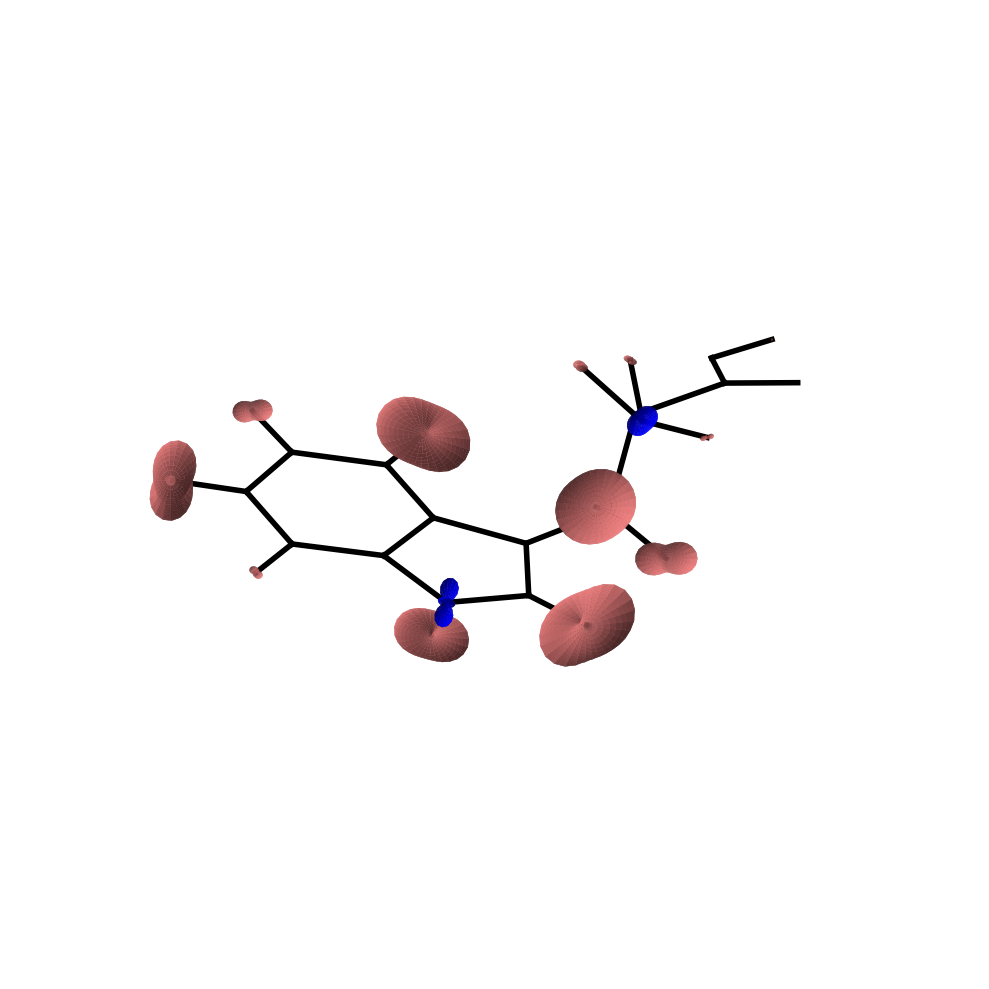

In [74]:
from pathlib import Path
from radicalpy import plot# plot_molecule, visualise_tensor
from radicalpy.utils import (
    define_xyz,
    infer_bonds,
    parse_xyz,
    read_orca_hyperfine,
)
import matplotlib.pyplot as plt
import numpy as np

# Import xyz file and plot 3D structure with HFCs from ORCA DFT calculation


# xyz for FMN
labels, elements, coords = parse_xyz("TrpC-opt-rotated.xyz")
bonds = infer_bonds(elements, coords)

N00, N01 = coords[0], coords[8]

rot = np.eye(3)
# Load HFCs from ORCA .out
indices, isotopes, hfc_matrices = read_orca_hyperfine(
    "TrpC-rotated-A.out"
)
N00hfc = hfc_matrices[0]
N01hfc = hfc_matrices[1]
H02hfc = hfc_matrices[6]

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(projection="3d")
ax.set_facecolor("none")
plot.visualise_tensor(ax, N00hfc / np.linalg.norm(H02hfc), rot, N00, "blue")
plot.visualise_tensor(ax, N01hfc / np.linalg.norm(H02hfc), rot, N01, "blue")
for k in range(15, 27):
    plot.visualise_tensor(ax, hfc_matrices[k-13] / np.linalg.norm(H02hfc), rot, coords[k], "lightcoral")
plot.plot_molecule(
    ax, labels, elements, coords, bonds, show_labels=False, show_atoms=False
)
elev = -90# + 110
azim = 270# + 20
ax.view_init(elev=elev, azim=azim)
plt.tight_layout()
ax.axis("off")
    # path = __file__[:-3] + f"_{1}.png"
    # plt.savefig(path)
plt.show()

Nucleus 0 (starts from 0) isotope 14N HFC matrix [mT]:
 [[ 0.0114291  -0.00599466  0.00362177]
 [-0.00600179  0.01378058 -0.00641214]
 [ 0.00361107 -0.00643712  0.00865657]]

Nucleus 8 (starts from 0) isotope 14N HFC matrix [mT]:
 [[-0.15094048  0.0008207   0.00528458]
 [ 0.0008314   0.46691603  0.0375915 ]
 [ 0.00522392  0.0375915  -0.13111173]]

Nucleus 15 (starts from 0) isotope 1H HFC matrix [mT]:
 [[-0.01253526  0.01648531 -0.00332918]
 [ 0.01652813  0.01938629 -0.0248921 ]
 [-0.00336843 -0.02490638 -0.00782517]]

Nucleus 16 (starts from 0) isotope 1H HFC matrix [mT]:
 [[ 0.0897022  -0.00183408  0.01088673]
 [-0.00184835  0.10993417 -0.03274582]
 [ 0.01088316 -0.03275295  0.1265408 ]]

Nucleus 17 (starts from 0) isotope 1H HFC matrix [mT]:
 [[-0.00899912 -0.01062624  0.03244252]
 [-0.01062268 -0.0257806  -0.02216953]
 [ 0.0323997  -0.0221838   0.01805177]]

Nucleus 18 (starts from 0) isotope 1H HFC matrix [mT]:
 [[-0.09541854 -0.08020352  0.00100625]
 [-0.08012502 -0.06210894 -0.0

<Figure size 640x480 with 0 Axes>

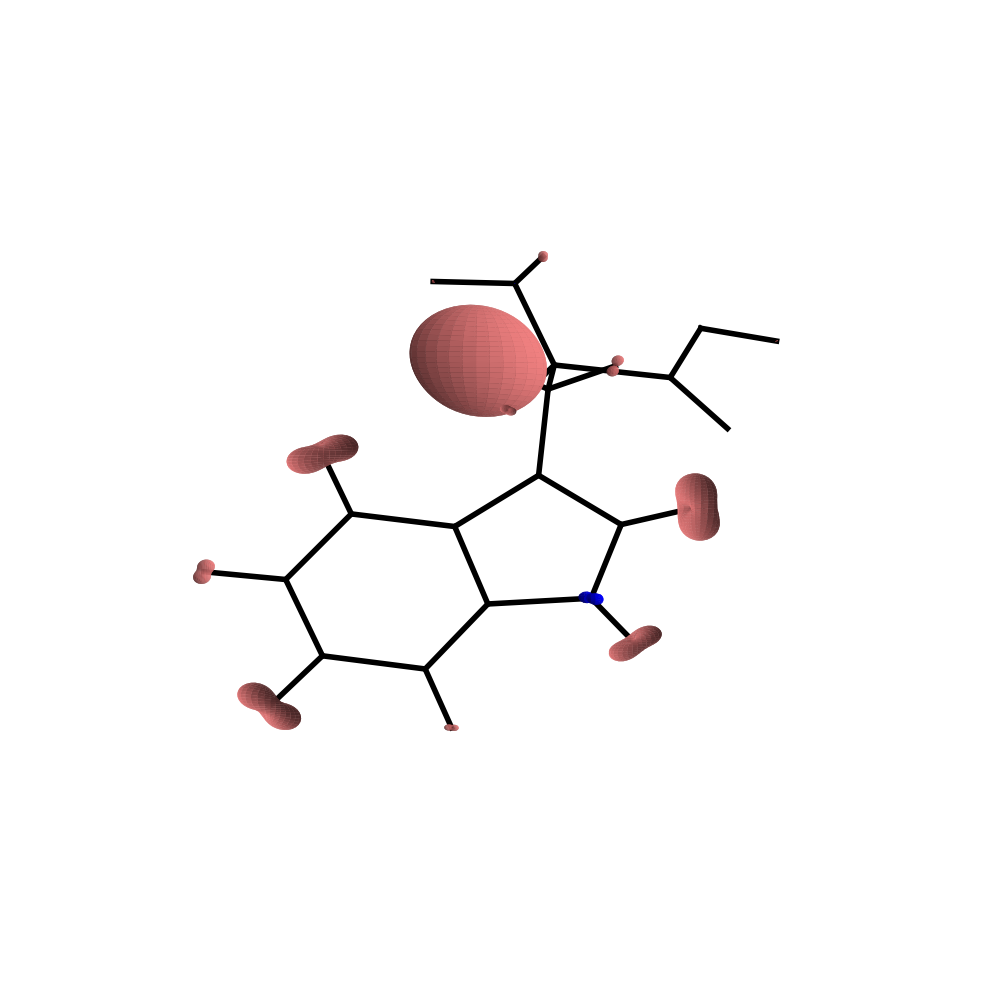

In [82]:
plt.clf()
# xyz for FMN
labels, elements, coords = parse_xyz("TrpD-opt-rotated.xyz")
bonds = infer_bonds(elements, coords)
N00, N01 = coords[0], coords[8]
rot = np.eye(3)
# Load HFCs from ORCA .out
indices, isotopes, hfc_matrices = read_orca_hyperfine(
    "TrpD-rotated-A.out"
)
N00hfc = hfc_matrices[0]
N01hfc = hfc_matrices[1]
scale = 1.6

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(projection="3d")
ax.set_facecolor("none")
plot.visualise_tensor(ax, N00hfc / scale, rot, N00, "blue")
plot.visualise_tensor(ax, N01hfc / scale, rot, N01, "blue")
for k in range(15, 27):
    plot.visualise_tensor(ax, hfc_matrices[k-13] / scale, rot, coords[k], "lightcoral")
plot.plot_molecule(
    ax, labels, elements, coords, bonds, show_labels=False, show_atoms=False
)
elev = 180# -90# + 110
azim = 270 + 20
ax.view_init(elev=elev, azim=azim)
plt.tight_layout()
ax.axis("off")
    # path = __file__[:-3] + f"_{1}.png"
    # plt.savefig(path)
plt.show()

In [56]:
define_xyz??

Signature: define_xyz(x1, x2, z1, z2, z3, z4)
Docstring: <no docstring>
Source:   
def define_xyz(x1, x2, z1, z2, z3, z4):
    a = np.array(z1) - np.array(z2)
    b = np.array(z3) - np.array(z4)
    z = np.cross(a, b)
    z = z / np.linalg.norm(z)
    x = (np.array(x1) - np.array(x2)) / np.linalg.norm((np.array(x1) - np.array(x2)))
    y = np.cross(z, x)
    x = np.cross(y, z)
    return x, y, z
File:      ~/GitHub/RP_tensor_network/scripts/crypto/coordinate/.venv/lib/python3.12/site-packages/radicalpy/utils.py
Type:      function

In [57]:
plot.visualise_tensor??

Signature: plot.visualise_tensor(ax, tensor, rot_matrix, coords, colour)
Docstring: <no docstring>
Source:   
def visualise_tensor(ax, tensor, rot_matrix, coords, colour):

    resolution = 30
    theta = np.linspace(0, np.pi, resolution)
    phi = np.linspace(0, 2 * np.pi, resolution)

    tensor_vis = np.zeros([len(theta), len(phi), 3])

    for i in range(0, len(theta)):
        for j in range(0, len(phi)):

            xyz = np.array(
                [
                    np.sin(theta[i]) * np.cos(phi[j]),
                    np.sin(theta[i]) * np.sin(phi[j]),
                    np.cos(theta[i]),
                ]
            )

            tensor_vis[i, j] = (
                np.dot(
                    np.dot(
                        xyz.T, np.array(rot_matrix) @ tensor @ np.array(rot_matrix).T
                    ),
                    xyz,
                )
                * xyz.T
                + coords
            )

    ax.plot_surface(
        tensor_vis[:, :, 0],
       